In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('covid19-symptoms.csv')
print(df.shape)
df.head(6)

(205753, 27)


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,China
1,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,China
2,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,China
3,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,China
4,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,China
5,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,China


In [ ]:
countries = pd.get_dummies(df['Country'],drop_first=True)
countries

,France,Germany,Iran,Italy,Republic of Korean,Spain
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
205748,0,1,0,0,0,0
205749,0,1,0,0,0,0
205750,0,1,0,0,0,0
205751,0,1,0,0,0,0


In [ ]:
df = pd.concat([df,countries],axis=1)
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,France,Germany,Iran,Italy,Republic of Korean,Spain
0,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,China,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,China,0,0,0,0,0,0
2,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,China,0,0,0,0,0,0
3,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,China,0,0,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,China,0,0,0,0,0,0


In [ ]:
df = df.drop(['Country'],axis=1)
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,France,Germany,Iran,Italy,Republic of Korean,Spain
0,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0
2,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
data = df.iloc[0:30000,0:5]
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat
0,0.447214,0.447214,0.447214,0.447214,0.447214
1,0.447214,0.447214,0.447214,0.447214,0.447214
2,0.447214,0.447214,0.447214,0.447214,0.447214
3,0.447214,0.447214,0.447214,0.447214,0.447214
4,0.447214,0.447214,0.447214,0.447214,0.447214


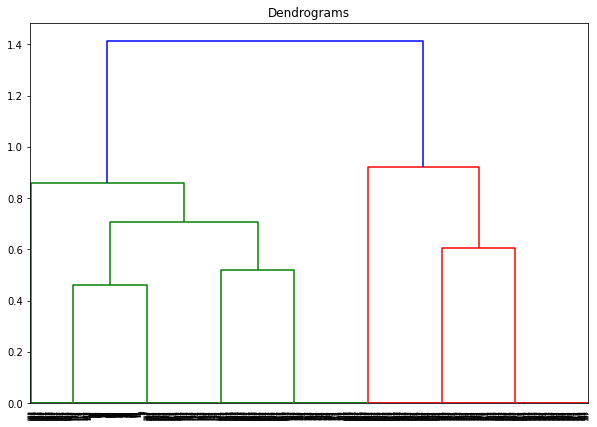

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled.head(1000), method="complete", metric='euclidean'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 2, 2, 2])

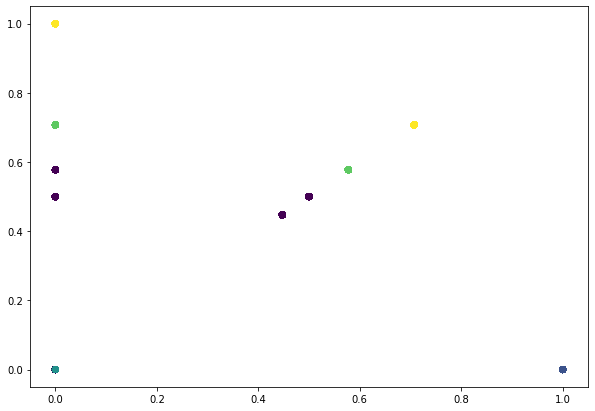

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Sore-Throat'], data_scaled['Difficulty-in-Breathing'], c=cluster.labels_)